Overview

The Revenue Tree is a hierarchical breakdown of factors contributing to overall revenue, allowing for detailed analysis of sales performance and identification of areas for improvement. It is also know as a KPI tree or sometimes as a driver tree.

In this notebook, we'll look at a quick overview of how to generate a revenue tree.

### Setup

Here we'll create some simulated data to demonstrate the code. You do not need to know this to perform segmentations.

In [ ]:
import pandas as pd

df = pd.read_parquet("../../data/transactions.parquet")
df.head()

,transaction_id,transaction_date,transaction_time,customer_id,product_id,product_name,category_0_name,category_0_id,category_1_name,category_1_id,brand_name,brand_id,unit_quantity,unit_cost,unit_spend,store_id
0,16050,2023-01-12,17:44:29,1,15,Spawn Figure,Toys,1,Action Figures,1,McFarlane Toys,3,2,36.10,55.98,6
1,16050,2023-01-12,17:44:29,1,1317,Gone Girl,Books,8,Mystery & Thrillers,53,Alfred A. Knopf,264,1,6.98,10.49,6
2,20090,2023-02-05,09:31:42,1,509,Ryzen 3 3300X,Electronics,3,Computer Components,21,AMD,102,3,200.61,360.00,4
3,20090,2023-02-05,09:31:42,1,735,Linden Wood Paneled Mirror,Home,5,Home Decor,30,Pottery Barn,147,1,379.83,599.00,4
4,20090,2023-02-05,09:31:42,1,1107,Pro-V Daily Moisture Renewal Conditioner,Beauty,7,Hair Care,45,Pantene,222,1,3.32,4.99,4


Some details about the data

In [ ]:
print(f"Number of unique customers: {df['customer_id'].nunique()}")
print(f"Number of unique transactions: {df['transaction_id'].nunique()}")

Number of unique customers: 4250
Number of unique transactions: 25490


In this simple example we want to compare revenue from the first half of the year with that from the second half to see how revenue changed and which factors drove it.

In [ ]:
from pyretailscience.analysis import revenue_tree

df["transaction_date"] = pd.to_datetime(df["transaction_date"])

df["period"] = df["transaction_date"].apply(lambda x: "p2" if x >= pd.to_datetime("2023-06-01") else "p1")

rev_tree = revenue_tree.RevenueTree(
    df=df,
    period_col="period",
    p1_value="p1",
    p2_value="p2",
)

The default view of the KPIs can be difficult to view. Use the `draw_tree` method to visualize the data as a tree.

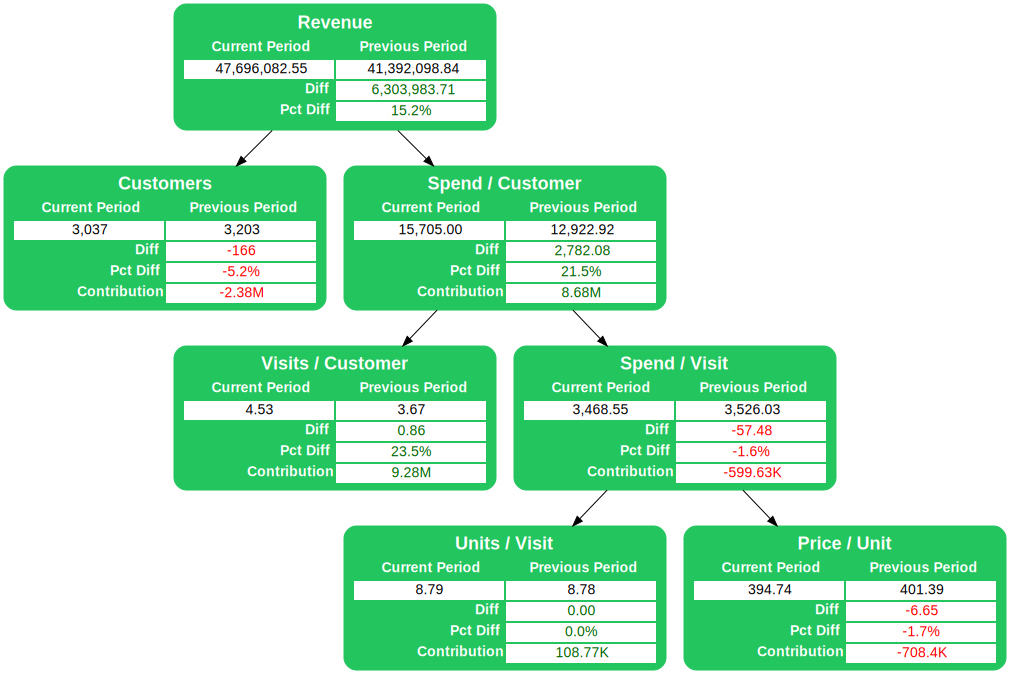

In [ ]:
rev_tree.draw_tree()